# Intel® Extension for Scikit-learn Performance Sample: SVC for [Adult dataset](https://www.openml.org/d/1430)

## Loading dataset

In [12]:
from time import time
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [13]:
from sklearn.datasets import fetch_openml
x, y = fetch_openml(name='a9a', return_X_y=True)

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Using Intel(R) Extension for Scikit-learn

Intel(R) Extension for Scikit-learn (previously known as daal4py) contains drop-in replacement functionality for the stock scikit-learn package. You can take advantage of the performance optimizations of Intel(R) Extension for Scikit-learn by adding just two lines of code before the usual scikit-learn imports:

In [15]:
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


Intel(R) Extension for Scikit-learn patching affects performance of specific Scikit-learn functionality. Refer to the [list of supported algorithms and parameters](https://intel.github.io/scikit-learn-intelex/algorithms.html) for details. In cases when unsupported parameters are used, the package fallbacks into original Scikit-learn. If the patching does not cover your scenarios, [submit an issue on GitHub](https://github.com/intel/scikit-learn-intelex/issues).

In [16]:
params = {
    'C': 100.0,
    'kernel': 'rbf',
    'gamma': 'scale'
}

Train SVC algorithm with Intel(R) Extension for Scikit-learn on Adult dataset:

In [17]:
start_opt = time()
from sklearn.svm import SVC
classifier = SVC(**params).fit(x_train, y_train)
finish_opt = time()
f"Execution time with Intel(R) Extension for Scikit-learn: {(finish_opt - start_opt):.2f} s"

'Execution time with Intel(R) Extension for Scikit-learn: 58.39 s'

Make predictions with SVC classifier and print a report of the main classification metrics:

In [18]:
predicted = classifier.predict(x_test)
acc_opt = metrics.accuracy_score(y_test, predicted)
report_opt = metrics.classification_report(y_test, predicted)
print(f"Classification report for SVC trained with Intel(R) extension for Scikit-learn:\n{report_opt}\n")

Classification report for SVC trained with Intel(R) extension for Scikit-learn:
              precision    recall  f1-score   support

        -1.0       0.87      0.90      0.88      7414
         1.0       0.64      0.58      0.61      2355

    accuracy                           0.82      9769
   macro avg       0.76      0.74      0.75      9769
weighted avg       0.82      0.82      0.82      9769




*The first column of the classification report above contains class labels.*  

## Using original Scikit-learn

To cancel optimizations, use `unpatch_sklearn` and reimport the SVC class.

In [19]:
from sklearnex import unpatch_sklearn
unpatch_sklearn()

Train SVC algorithm with original scikit-learn library on Adult dataset:

In [20]:
start_unopt = time()
from sklearn.svm import SVC
classifier = SVC(**params).fit(x_train, y_train)
finish_unopt = time()
f"Execution time with the original Scikit-learn: {(finish_unopt - start_unopt):.2f} s"

'Execution time with the original Scikit-learn: 731.59 s'

Predict and get a result of the SVC algorithm with original Scikit-learn.

In [21]:
predicted = classifier.predict(x_test)
acc_unopt = metrics.accuracy_score(y_test, predicted)
report_unopt = metrics.classification_report(y_test, predicted)
print(f"Classification report for SVC trained with the original scikit-learn:\n{report_unopt}\n")

Classification report for SVC trained with the original scikit-learn:
              precision    recall  f1-score   support

        -1.0       0.87      0.90      0.88      7414
         1.0       0.64      0.58      0.61      2355

    accuracy                           0.82      9769
   macro avg       0.76      0.74      0.75      9769
weighted avg       0.82      0.82      0.82      9769




## Visualizations

### Performance

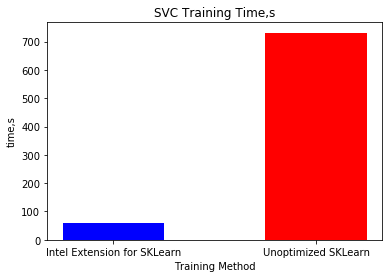

Performance Speedup:  12.529641264857615


In [22]:
import matplotlib.pyplot as plt
left = [1,2]
pred_times = [finish_opt - start_opt, finish_unopt - start_unopt]
tick_label = ['Intel Extension for SKLearn', 'Unoptimized SKLearn']
plt.bar(left, pred_times, tick_label = tick_label, width = 0.5, color = ['blue', 'red'])
plt.xlabel('Training Method'); plt.ylabel('time,s'); plt.title('SVC Training Time,s')
plt.show()
print("Performance Speedup: ",(finish_unopt - start_unopt)/(finish_opt - start_opt))

### Accuracy

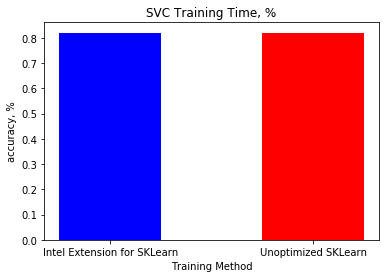

Accuracy Difference:  0.0


In [23]:
left = [1,2]
pred_acc = [acc_opt, acc_unopt]
tick_label = ['Intel Extension for SKLearn', 'Unoptimized SKLearn']
plt.bar(left, pred_acc, tick_label = tick_label, width = 0.5, color = ['blue', 'red'])
plt.xlabel('Training Method'); plt.ylabel('accuracy, %'); plt.title('SVC Training Time, %')
plt.show()
print("Accuracy Difference: ",acc_opt - acc_unopt)

## Conclusions 

With Intel(R) Extension for Scikit-learn you can:

- Use your existing scikit-learn code for training and prediction;
- Add a couple of lines to execute your code up to be significantly faster than stock scikit-learn;
- Get models of the same quality.